In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [5]:
df = pd.read_csv('New York Airbnb_4 dec 2021.csv')
df = df.drop('id',axis=1)
df = df.drop('host_id',axis=1)
df = df.drop('host_name',axis=1)
df = df.drop('name',axis=1)
df = df.drop('license',axis = 1)

mean_rpm = df['reviews_per_month'].mean()

for x in range(len(df['reviews_per_month'])):
    if df['reviews_per_month'][x] == 'NaN':
        df['reviews_per_month'][x] = mean_rpm
    else:
        pass

df

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,150,30,48,2019-11-04,0.33,3,338,0
1,Brooklyn,Bedford-Stuyvesant,40.684940,-73.957650,Entire home/apt,75,1,409,2021-10-22,4.86,1,194,32
2,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60,30,50,2016-06-05,0.52,2,365,0
3,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,275,5,2,2021-08-08,0.02,1,123,1
4,Manhattan,Midtown,40.764570,-73.983170,Private room,68,2,507,2021-11-08,3.68,1,192,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38272,Staten Island,Port Richmond,40.632222,-74.136715,Private room,79,1,0,NaN,NaN,6,359,0
38273,Staten Island,Port Richmond,40.630502,-74.136142,Private room,76,1,0,NaN,NaN,6,359,0
38274,Manhattan,Midtown,40.753887,-73.980536,Private room,116,1,0,NaN,NaN,13,11,0
38275,Manhattan,Midtown,40.755569,-73.981976,Private room,106,1,0,NaN,NaN,13,3,0


In [6]:
df.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
latitude,1.000000,0.057180,0.027341,0.034219,-0.048009,-0.036667,0.079537,0.013829,-0.048845
longitude,0.057180,1.000000,-0.114842,-0.085495,0.067589,0.071212,-0.065429,0.095958,0.064579
price,0.027341,-0.114842,1.000000,-0.032840,-0.032995,0.008139,-0.015851,0.082539,0.003160
minimum_nights,0.034219,-0.085495,-0.032840,1.000000,-0.144853,-0.188974,0.098955,-0.015535,-0.205060
number_of_reviews,-0.048009,0.067589,-0.032995,-0.144853,1.000000,0.277333,-0.108050,0.096066,0.573238
reviews_per_month,-0.036667,0.071212,0.008139,-0.188974,0.277333,1.000000,0.011475,0.142474,0.593913
calculated_host_listings_count,0.079537,-0.065429,-0.015851,0.098955,-0.108050,0.011475,1.000000,0.212912,-0.051579
availability_365,0.013829,0.095958,0.082539,-0.015535,0.096066,0.142474,0.212912,1.000000,0.124312
number_of_reviews_ltm,-0.048845,0.064579,0.003160,-0.205060,0.573238,0.593913,-0.051579,0.124312,1.000000


In [7]:
features = df[['latitude','longitude','availability_365']]
target = df['price']

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size = 0.2, random_state = 42)
model = KNeighborsClassifier(5)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print('Score =', model.score(x_test,y_test))


Score = 0.03396029258098224


In [8]:
features = df[['latitude','longitude']]
target = df['price']

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size = 0.2, random_state = 42)
model = KNeighborsClassifier(5)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print('Score =', model.score(x_test,y_test))

Score = 0.03605015673981191


In [9]:
features = df[['number_of_reviews','number_of_reviews_ltm']]
target = df['price']

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size = 0.2, random_state = 42)
model = KNeighborsClassifier(5)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print('Score =', model.score(x_test,y_test))

Score = 0.013061650992685475


In [10]:
features = df[['latitude','longitude','availability_365','calculated_host_listings_count']]
target = df['price']

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print('Score =', model.score(x_test,y_test))

Score = 0.02365905966705728


ValueError: x and y must be the same size

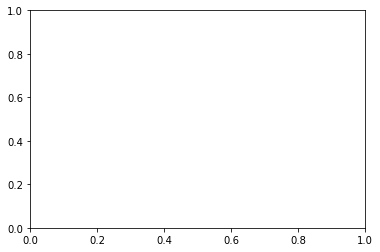

In [11]:
plt.scatter(x_test, y_test)
plt.plot(x_test, predictions, 'k', linewidth=4)
plt.legend(["Predictions","Actual Values"])
plt.title('Our Features vs Price')
plt.xlabel('Our Features')
plt.ylabel('price')
plt.show()